# Business Objective : 
    
1. Most customers - when will they order, what will they order? - This can be formated as when there will be MAX orders and What would be the items ordered?

2. How many customers are going to order a particular menu item and when will they order? - For each item, how many orders might be placed.


## Load Necessary Libraries and the Data

In [138]:
import pandas as pd
import numpy as np
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

data = pd.read_excel("For Testing.xlsx")

## Print the Loaded data

In [139]:
data.head(10)

,Customer Name,Created On,Order Total,Order Type,Order Notes,Customer Email,Customer Phone,Payment Type,OrderStatus,Order Item,Order Item Price,Quantity
0,NaN,2019-01-10_10:27:07.0,9.07,pickUp,,NaN,NaN,Cash,Confirmed,sedona salad,6.99,1
1,NaN,2019-01-10_16:48:23.0,2.57,pickUp,,NaN,NaN,Cash,Confirmed,Canned Soda,0.99,1
2,NaN,2019-01-10_16:52:28.0,2.57,pickUp,,NaN,NaN,Cash,Pending,Canned Soda,0.99,1
3,NaN,2019-01-10_17:00:10.0,4.74,pickUp,,NaN,NaN,Cash,Confirmed,2 Liter Soda,2.99,1
4,NaN,2019-01-10_17:20:27.0,14.79,pickUp,This is a sample order,NaN,NaN,Cash,Confirmed,Cheese Pizza,7.99,1
5,NaN,2019-01-11_13:03:34.0,2.57,pickUp,,NaN,NaN,Credit Card,Confirmed,Canned Soda,0.99,1
6,NaN,2019-01-11_20:09:06.0,3.55,pickUp,,NaN,NaN,Credit Card,Confirmed,Milk,1.89,1
7,NaN,2019-01-13_16:47:15.0,58.43,delivery,,NaN,NaN,Credit Card,Confirmed,the ralphie?s,17.99,1
8,NaN,,,,,NaN,NaN,,,The classic,14.99,1
9,NaN,2019-01-13_18:24:09.0,35.04,delivery,,NaN,NaN,Credit Card,Confirmed,nutty hawaiian salad,5.99,1


In [140]:
#Make a Copy of Original Data
df = data.copy()

In [141]:
#Fill in the empty columns with values from previous row in that column

#First, replace your empty cells with NaNs and then fill them with the previous row values.

df[df['Created On'] == " "]
df['Created On'].replace(" ",np.NaN,inplace=True)

In [45]:
df['Created On'] = df['Created On'].fillna(method='ffill')

In [46]:
df.head(10)

,Customer Name,Created On,Order Total,Order Type,Order Notes,Customer Email,Customer Phone,Payment Type,OrderStatus,Order Item,Order Item Price,Quantity
0,NaN,2019-01-10_10:27:07.0,9.07,pickUp,,NaN,NaN,Cash,Confirmed,sedona salad,6.99,1
1,NaN,2019-01-10_16:48:23.0,2.57,pickUp,,NaN,NaN,Cash,Confirmed,Canned Soda,0.99,1
2,NaN,2019-01-10_16:52:28.0,2.57,pickUp,,NaN,NaN,Cash,Pending,Canned Soda,0.99,1
3,NaN,2019-01-10_17:00:10.0,4.74,pickUp,,NaN,NaN,Cash,Confirmed,2 Liter Soda,2.99,1
4,NaN,2019-01-10_17:20:27.0,14.79,pickUp,This is a sample order,NaN,NaN,Cash,Confirmed,Cheese Pizza,7.99,1
5,NaN,2019-01-11_13:03:34.0,2.57,pickUp,,NaN,NaN,Credit Card,Confirmed,Canned Soda,0.99,1
6,NaN,2019-01-11_20:09:06.0,3.55,pickUp,,NaN,NaN,Credit Card,Confirmed,Milk,1.89,1
7,NaN,2019-01-13_16:47:15.0,58.43,delivery,,NaN,NaN,Credit Card,Confirmed,the ralphie?s,17.99,1
8,NaN,2019-01-13_16:47:15.0,,,,NaN,NaN,,,The classic,14.99,1
9,NaN,2019-01-13_18:24:09.0,35.04,delivery,,NaN,NaN,Credit Card,Confirmed,nutty hawaiian salad,5.99,1


In [47]:
df.columns

Index(['Customer Name', 'Created On', 'Order Total', 'Order Type',
       'Order Notes', ' Customer Email', 'Customer Phone', 'Payment Type',
       'OrderStatus', 'Order Item ', 'Order Item Price', ' Quantity'],
      dtype='object')

In [48]:
df.shape

(1697, 12)

In [49]:
df.describe()

,Customer Name,Customer Phone,Order Item Price,Quantity
count,0.0,0.0,1697.000000,1697.000000
mean,NaN,NaN,8.713742,1.057749
std,NaN,NaN,5.108735,0.266375
min,NaN,NaN,0.990000,1.000000
25%,NaN,NaN,4.990000,1.000000
50%,NaN,NaN,8.990000,1.000000
75%,NaN,NaN,9.990000,1.000000
max,NaN,NaN,27.980000,5.000000


In [50]:
df['Created On'] = df['Created On'].str.replace("_"," ")

In [51]:
df.head()

,Customer Name,Created On,Order Total,Order Type,Order Notes,Customer Email,Customer Phone,Payment Type,OrderStatus,Order Item,Order Item Price,Quantity
0,NaN,2019-01-10 10:27:07.0,9.07,pickUp,,NaN,NaN,Cash,Confirmed,sedona salad,6.99,1
1,NaN,2019-01-10 16:48:23.0,2.57,pickUp,,NaN,NaN,Cash,Confirmed,Canned Soda,0.99,1
2,NaN,2019-01-10 16:52:28.0,2.57,pickUp,,NaN,NaN,Cash,Pending,Canned Soda,0.99,1
3,NaN,2019-01-10 17:00:10.0,4.74,pickUp,,NaN,NaN,Cash,Confirmed,2 Liter Soda,2.99,1
4,NaN,2019-01-10 17:20:27.0,14.79,pickUp,This is a sample order,NaN,NaN,Cash,Confirmed,Cheese Pizza,7.99,1


In [52]:
#Remove Unwanted Columns
df.drop(columns=['Customer Name', 'Order Total', 'Order Type','Order Notes',' Customer Email','Customer Phone','Payment Type','OrderStatus','Order Item Price'],inplace=True)

In [53]:
df.head()

,Created On,Order Item,Quantity
0,2019-01-10 10:27:07.0,sedona salad,1
1,2019-01-10 16:48:23.0,Canned Soda,1
2,2019-01-10 16:52:28.0,Canned Soda,1
3,2019-01-10 17:00:10.0,2 Liter Soda,1
4,2019-01-10 17:20:27.0,Cheese Pizza,1


In [54]:
df.dtypes

Created On     object
Order Item     object
 Quantity       int64
dtype: object

In [55]:
df['Created On'] = pd.to_datetime(df['Created On'])

In [56]:
df.dtypes

Created On     datetime64[ns]
Order Item             object
 Quantity               int64
dtype: object

In [57]:
df['Created On'].min()

Timestamp('2019-01-10 10:27:07')

In [58]:
df['Created On'].max()

Timestamp('2019-09-23 18:19:30')

In [59]:
df = df.sort_values('Created On')

In [60]:
#Check for any missing values
df.isnull().sum()

Created On     0
Order Item     0
 Quantity      0
dtype: int64

In [61]:
df['Order Item '].unique()

array(['sedona salad', 'Canned Soda', '2 Liter Soda', 'Cheese Pizza',
       'Milk', 'the ralphie?s', 'The classic', 'nutty hawaiian salad',
       'cade & blake pesto Calzone', 'greek bread', 'greek salad',
       'greek gyro', 'lasagna', 'Shrimp il palio/alfredo',
       'baked buffalo wings', 'baked mac & cheese', 'Hot Club Sandwich',
       'grace?s alfredo', 'spaghetti', 'Chicken alfredo or blackened',
       'italian Sub', 'tiramisu', 'cannoli', 'the mediterranean',
       'the scorcher', 'pasta arrabiata', 'dinner salad',
       'Chocolate Mousse Cake', 'manicotti', 'chicken parmesan',
       'baked ziti', 'the king', 'new york style plain cheesecake',
       'Kids chicken nuggets', 'kids baked mac & cheese',
       'The classic Calzone', 'Strawberry Cheesecake',
       'mozzarella sticks', 'Tamato Basil Soup', 'palio?s vegetable',
       'caramel turtle cheesecake', 'hawaiian sunrise', 'the Prestino',
       'the mediterranean Calzone', 'cheese bread', 'cade & blake pesto',
   

In [62]:
#Now Cleanse the item column
#It has '?' marks, the word 'Any', 'BUY ANY LARGE CALAZONE','BUY ANY PIZZA','BUY ANY MEDIUM CALAZONE','BUY ANY MEDIUM PIZZA','BUY ANY X-LARGE PIZZA'
df['Order Item '] = df['Order Item '].str.replace(r'?',"")
df['Order Item '] = df['Order Item '].str.replace("Any","")
df['Order Item '] = df['Order Item '].str.replace(r'\(.*?\)','',regex=True)

In [63]:
df['Order Item '] = df['Order Item '].str.replace(r'^BUY ANY X-LARGE PIZZA.*$','pizza')
df['Order Item '] = df['Order Item '].str.replace(r'^BUY ANY MEDIUM PIZZA.*$','pizza')
df['Order Item '] = df['Order Item '].str.replace(r'^BUY ANY LARGE PIZZA.*$','pizza')
df['Order Item '] = df['Order Item '].str.replace(r'^BUY ANY LARGE CALZONE.*$','calzone')
df['Order Item '] = df['Order Item '].str.replace(r'^BUY ANY MEDIUM CALZONE.*$','calzone')

In [64]:
df['Order Item'] = df['Order Item '].str.lower()
df['Order Item'] = df['Order Item'].str.strip()

In [65]:
df.to_excel("output.xlsx")

In [66]:
df['Order Item'].unique()

array(['sedona salad', 'canned soda', '2 liter soda', 'cheese pizza',
       'milk', 'the ralphies', 'the classic', 'nutty hawaiian salad',
       'cade & blake pesto calzone', 'greek bread', 'greek salad',
       'greek gyro', 'lasagna', 'shrimp il palio/alfredo',
       'baked buffalo wings', 'baked mac & cheese', 'hot club sandwich',
       'graces alfredo', 'spaghetti', 'chicken alfredo or blackened',
       'italian sub', 'tiramisu', 'cannoli', 'the mediterranean',
       'the scorcher', 'pasta arrabiata', 'dinner salad',
       'chocolate mousse cake', 'manicotti', 'chicken parmesan',
       'baked ziti', 'the king', 'new york style plain cheesecake',
       'kids chicken nuggets', 'kids baked mac & cheese',
       'the classic calzone', 'strawberry cheesecake',
       'mozzarella sticks', 'tamato basil soup', 'palios vegetable',
       'caramel turtle cheesecake', 'hawaiian sunrise', 'the prestino',
       'the mediterranean calzone', 'cheese bread', 'cade & blake pesto',
      

In [67]:
df['Order Item'] = df['Order Item'].astype('category')

In [68]:
# Dropping old  columns 
df.drop(columns =["Order Item "], inplace = True) 

In [69]:
df.dtypes

Created On    datetime64[ns]
 Quantity              int64
Order Item          category
dtype: object

In [129]:
df['Ordred month'] = pd.DatetimeIndex(df['Created On']).month
df['Ordered Weekday'] = pd.DatetimeIndex(df['Created On']).dayofweek

In [130]:
df.tail()

,Created On,Quantity,Order Item,Ordred month,Ordered Weekday
1691,2019-09-22 20:03:24,1,spaghetti,9,6
1694,2019-09-23 18:19:30,1,caesar salad,9,0
1695,2019-09-23 18:19:30,2,tamato basil soup,9,0
1693,2019-09-23 18:19:30,1,caesar salad,9,0
1696,2019-09-23 18:19:30,1,soda,9,0


In [70]:
df_ord = df.groupby('Created On')[' Quantity'].sum().reset_index()

In [71]:
df_ord.head()

,Created On,Quantity
0,2019-01-10 10:27:07,1
1,2019-01-10 16:48:23,1
2,2019-01-10 16:52:28,1
3,2019-01-10 17:00:10,1
4,2019-01-10 17:20:27,1


In [72]:
df_ordered = df.groupby('Created On')['Order Item'].count().reset_index()

In [73]:
df_ordered.tail()

,Created On,Order Item
611,2019-09-22 17:34:41,1
612,2019-09-22 18:16:27,5
613,2019-09-22 19:45:50,1
614,2019-09-22 20:03:24,2
615,2019-09-23 18:19:30,4


In [74]:
df_ordered = df_ordered.set_index('Created On')
df_ordered.index

DatetimeIndex(['2019-01-10 10:27:07', '2019-01-10 16:48:23',
               '2019-01-10 16:52:28', '2019-01-10 17:00:10',
               '2019-01-10 17:20:27', '2019-01-11 13:03:34',
               '2019-01-11 20:09:06', '2019-01-13 16:47:15',
               '2019-01-13 18:24:09', '2019-01-16 16:33:14',
               ...
               '2019-09-21 19:15:21', '2019-09-21 19:40:23',
               '2019-09-21 19:57:49', '2019-09-22 12:01:41',
               '2019-09-22 16:18:01', '2019-09-22 17:34:41',
               '2019-09-22 18:16:27', '2019-09-22 19:45:50',
               '2019-09-22 20:03:24', '2019-09-23 18:19:30'],
              dtype='datetime64[ns]', name='Created On', length=616, freq=None)

In [75]:
#the averages daily sales value for that month instead, and we are using the start of each month as the timestamp.
y = df_ordered['Order Item'].resample('MS').mean()

In [76]:
y['2019':]

Created On
2019-01-01    2.405405
2019-02-01    3.047619
2019-03-01    3.255814
2019-04-01    2.858696
2019-05-01    2.675325
2019-06-01    2.615385
2019-07-01    2.428571
2019-08-01    2.883721
2019-09-01    2.890411
Freq: MS, Name: Order Item, dtype: float64

### Plot the month wise count of orders 

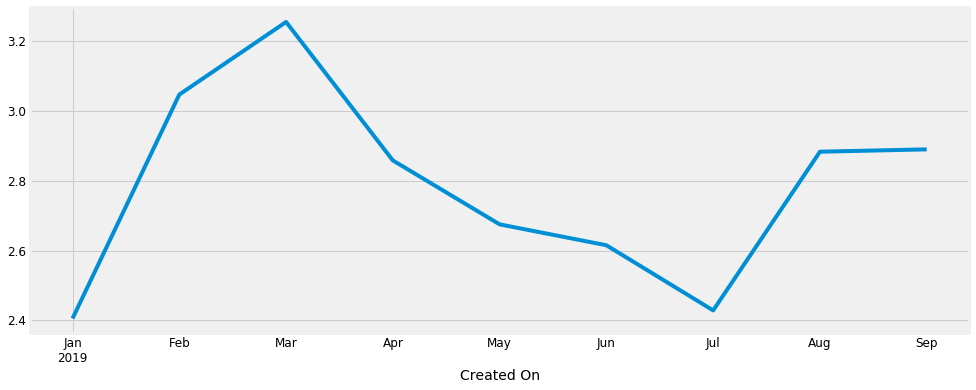

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
y.plot(figsize=(15, 6))
plt.show()

### Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, 
### such as sales are always low at the beginning of the year and medium at the end of the year. 
### There is always an upward trend between Jan and Mar and between Mar and Jul is a couple of low months in the mid of the year 
### and then a upward trends afterwards.

In [90]:
df_ordered.columns

Index(['Order Item'], dtype='object')

In [100]:
week_df = df_ordered.groupby(df_ordered.index.weekday_name).mean()
print (week_df.sort_index())

            Order Item
Created On            
Friday        2.603175
Monday        2.765957
Saturday      2.955357
Sunday        3.075630
Thursday      2.716667
Tuesday       2.521739
Wednesday     2.469880


In [112]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(days)}
key = week_df.index.map(mapping)
#print(key)
week_df = week_df.iloc[key.argsort()]
print(week_df)

            Order Item
Created On            
Monday        2.765957
Tuesday       2.521739
Wednesday     2.469880
Thursday      2.716667
Friday        2.603175
Saturday      2.955357
Sunday        3.075630
<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Monday to Sunday
Data columns (total 1 columns):
Order Item    7 non-null float64
dtypes: float64(1)
memory usage: 112.0+ bytes
None


### Plot the Count of orders by weekday

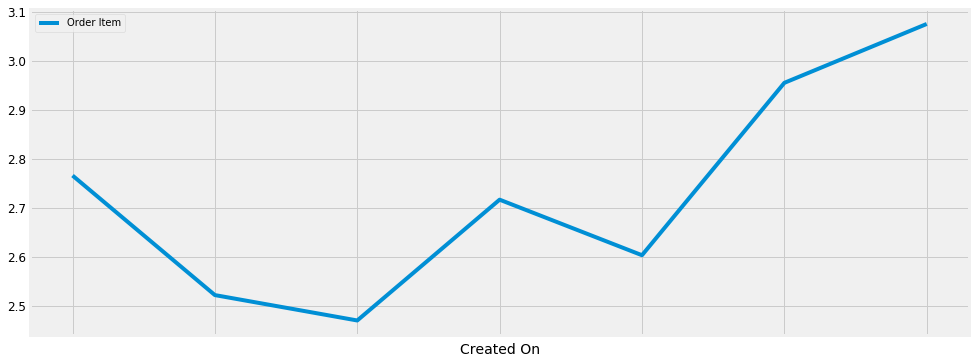

In [125]:
week_df.plot(figsize=(15, 6))
plt.show()


### As expected during weekends the sales is high

In [132]:
#When they will order and what they will order....
#During month of Mar the sales are expected to rise and also during weekends ( saturday and sunday ) the sale is high.

#What they will order
df.pivot_table(' Quantity', index='Ordred month', columns='Order Item')


Order Item,2 liter soda,artichoke deluxe,baked buffalo wings,baked mac & cheese,baked ziti,beef ravioli,bottled water,cade & blake pesto,cade & blake pesto calzone,caesar salad,...,the classic calzone,the greek,the king,the king calzone,the mediterranean,the mediterranean calzone,the prestino,the ralphies,the scorcher,tiramisu
Ordred month,,,,,,,,,,,,,,,,,,,,,
1,1.0,NaN,1.000000,1.0,1.0,NaN,NaN,1.0,1.0,NaN,...,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.000000
2,NaN,NaN,1.000000,1.0,1.5,1.0,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.333333
3,1.0,NaN,1.000000,1.0,1.0,NaN,NaN,NaN,NaN,1.000000,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.142857
4,1.0,1.0,1.333333,1.0,1.0,1.0,NaN,1.0,NaN,1.250000,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.333333
5,1.0,NaN,1.142857,NaN,1.0,NaN,NaN,1.0,NaN,1.125000,...,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,1.000000
6,1.0,NaN,1.333333,1.0,1.0,1.0,NaN,NaN,NaN,1.222222,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.076923
7,1.0,NaN,1.000000,1.0,1.0,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.000000
8,1.0,NaN,1.166667,1.0,1.0,1.0,NaN,NaN,NaN,1.000000,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.500000
9,1.0,NaN,1.166667,1.0,1.0,1.0,1.0,NaN,NaN,1.083333,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.200000


In [133]:
df.pivot_table(' Quantity', index='Ordered Weekday', columns='Order Item')

Order Item,2 liter soda,artichoke deluxe,baked buffalo wings,baked mac & cheese,baked ziti,beef ravioli,bottled water,cade & blake pesto,cade & blake pesto calzone,caesar salad,...,the classic calzone,the greek,the king,the king calzone,the mediterranean,the mediterranean calzone,the prestino,the ralphies,the scorcher,tiramisu
Ordered Weekday,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.000000,NaN,1.000000,1.0,NaN,NaN,NaN,1.000000,...,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.000000
1,1.0,NaN,2.000000,1.0,1.000000,NaN,NaN,1.0,NaN,1.000000,...,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,1.125000
2,NaN,NaN,1.142857,1.0,1.000000,1.0,NaN,1.0,NaN,1.285714,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
3,1.0,NaN,1.000000,1.0,1.000000,1.0,NaN,NaN,NaN,1.000000,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.000000
4,1.0,NaN,1.000000,1.0,1.166667,1.0,NaN,1.0,NaN,1.125000,...,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.500000
5,1.0,NaN,1.222222,1.0,1.000000,1.0,NaN,NaN,NaN,1.200000,...,1.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,1.200000
6,1.0,NaN,1.363636,1.0,1.000000,NaN,1.0,NaN,1.0,1.153846,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.307692


In [135]:
df_new = df.groupby('Order Item')[' Quantity'].sum().reset_index()
df_new

,Order Item,Quantity
0,2 liter soda,14
1,artichoke deluxe,1
2,baked buffalo wings,53
3,baked mac & cheese,22
4,baked ziti,24
5,beef ravioli,8
6,bottled water,1
7,cade & blake pesto,3
8,cade & blake pesto calzone,1
9,caesar salad,60


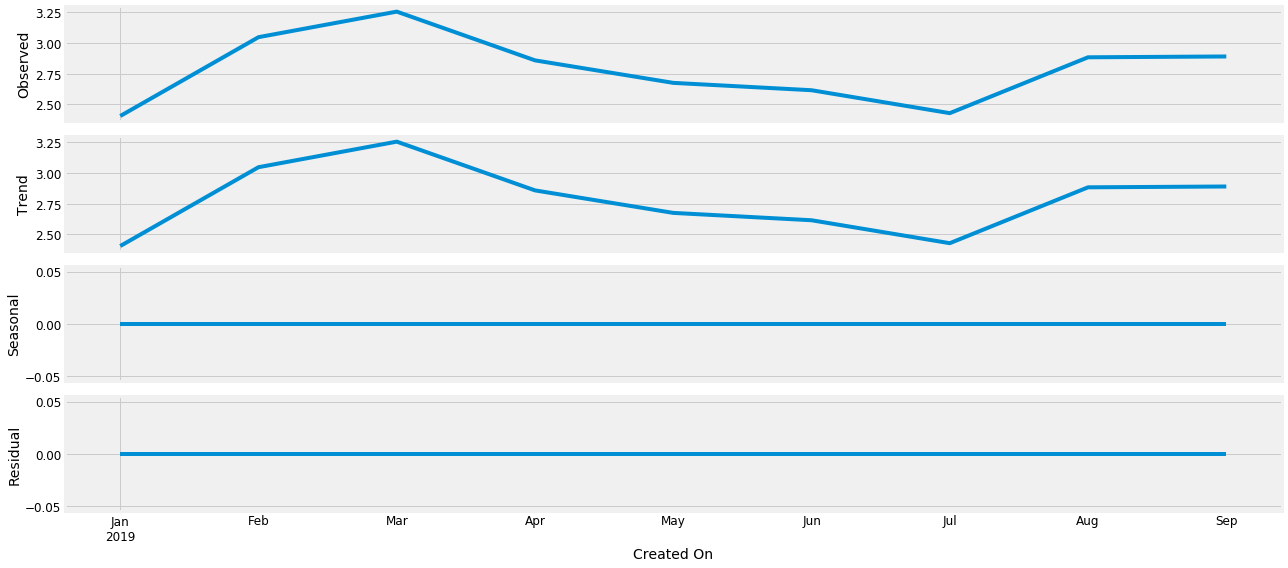

In [85]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, freq=1, model='additive',filt=None,two_sided=True)
fig = decomposition.plot()
plt.show()

In [ ]:
#Now We can forecast using the models...and compare the actual trend and forecasts.